In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\chris\Downloads\Music_and_Therapy-_Survey - Music_and_Therapy-_Survey (1).csv")

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 728
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          614 non-null    datetime64[ns]
 1   Age                           614 non-null    int64         
 2   Primary Streaming Service     614 non-null    object        
 3   Hours per day                 614 non-null    float64       
 4   While working                 614 non-null    object        
 5   Fav Genre                     614 non-null    object        
 6   Foreign languages             614 non-null    object        
 7   Exploratory                   614 non-null    object        
 8   BPM                           614 non-null    float64       
 9   Frequency [Classical]         614 non-null    object        
 10  Frequency [Country]           614 non-null    object        
 11  Frequency [EDM]               61

In [4]:
# changing dtype of Date column from object to datetime

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Checking for null values & duplicates

In [7]:
data.isnull().sum()

Date                              0
Age                               0
Primary Streaming Service         0
Hours per day                     0
While working                     1
Fav Genre                         0
Foreign languages                 3
Timestamp                         3
Timestamp.1                       0
Exploratory                       0
BPM                             104
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Date                            0
Age                             0
Primary Streaming Service       0
Hours per day                   0
While working                   0
Fav Genre                       0
Foreign languages               0
Timestamp                       0
Timestamp.1                     0
Exploratory                     0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [10]:
data.duplicated().any()

False

In [11]:
data.head(1)

,Date,Age,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Timestamp,Timestamp.1,Exploratory,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-28 07:38:00,89,YouTube Music,2.0,Yes,Hip hop,Yes,No,No,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.


In [12]:
# dropping unecessary columns -> Timestamp & Timestamp.1

In [13]:
data = data.drop(['Timestamp','Timestamp.1'],axis=1)

In [14]:
data.head(1)

,Date,Age,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Exploratory,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-28 07:38:00,89,YouTube Music,2.0,Yes,Hip hop,Yes,Yes,98.0,Sometimes,...,Very frequently,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.


In [15]:
# Total rows & columns after removing null values & columns

In [16]:
print ("Total no. of rows =",data.shape[0])
print ("Total no. of columns =",data.shape[1])

Total no. of rows = 614
Total no. of columns = 31


# Visualization

In [17]:
data['Primary Streaming Service'].unique()

array(['YouTube Music', 'Spotify', 'Other streaming service',
       'I do not use a streaming service.', 'Apple Music', 'Pandora',
       'apple Music'], dtype=object)

In [18]:
# Apple Music is repeated again. Replacing it with the first one

In [19]:
data.replace('apple Music','Apple Music',inplace=True)

In [20]:
data['Primary Streaming Service'].unique()

array(['YouTube Music', 'Spotify', 'Other streaming service',
       'I do not use a streaming service.', 'Apple Music', 'Pandora'],
      dtype=object)

In [21]:
data['Primary Streaming Service'].value_counts()

Spotify                              395
YouTube Music                         72
I do not use a streaming service.     56
Apple Music                           43
Other streaming service               39
Pandora                                9
Name: Primary Streaming Service, dtype: int64

In [22]:
primary_service = data['Primary Streaming Service'].value_counts().tolist()

In [23]:
primary_label = data['Primary Streaming Service'].value_counts().index

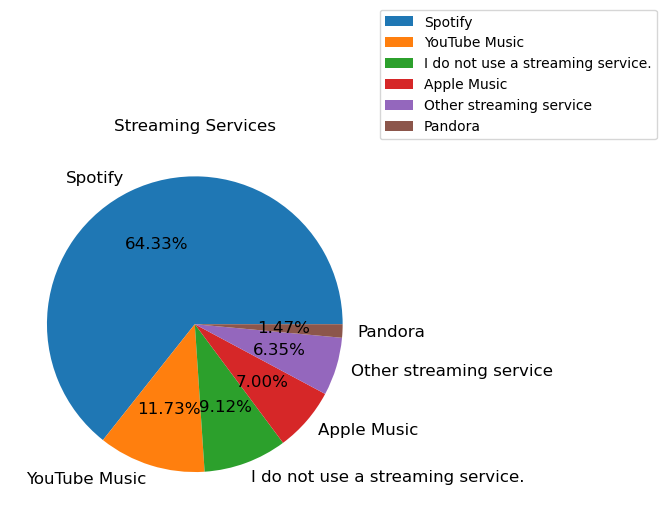

In [24]:
plt.pie(primary_service,labels=primary_label,autopct = '%0.2f%%',textprops={'fontsize':12})
plt.title('Streaming Services')
plt.legend(loc=(1,1))
plt.show()

In [25]:
# The streaming service used by majority is Spotfiy
# Only 1.47% use Pandora

In [26]:
data.head(1)

,Date,Age,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Exploratory,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-28 07:38:00,89,YouTube Music,2.0,Yes,Hip hop,Yes,Yes,98.0,Sometimes,...,Very frequently,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.


In [27]:
# Representation of null values

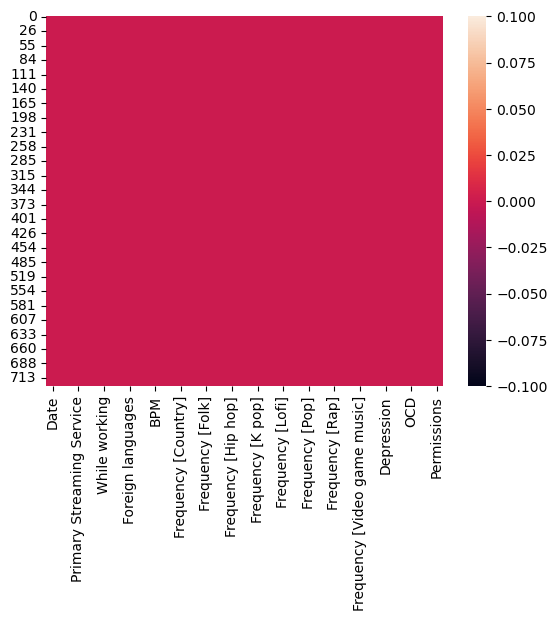

In [28]:
sns.heatmap(data.isnull())
plt.show()

In [29]:
Genre = data['Fav Genre'].value_counts().tolist()

In [30]:
genre_label = data['Fav Genre'].value_counts().index

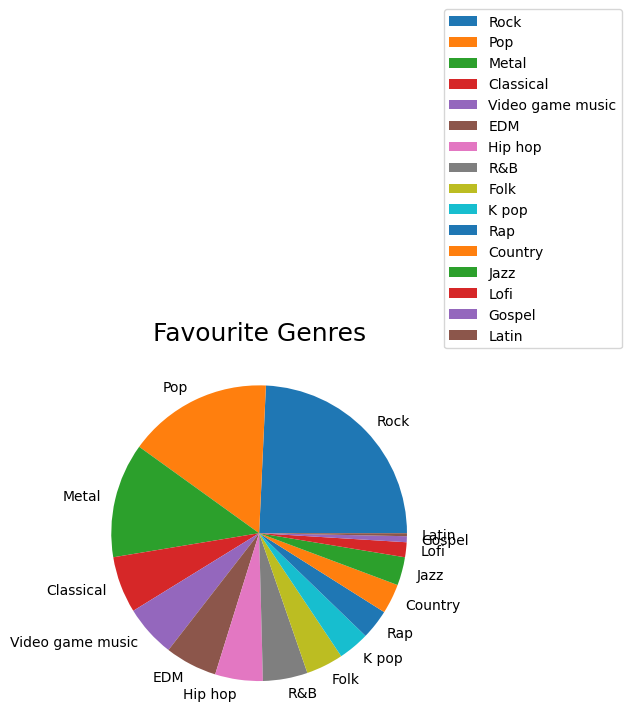

In [31]:
plt.pie(Genre,labels=genre_label)
plt.title('Favourite Genres',fontsize=18)
plt.legend(loc=(1,1))
plt.show()

In [32]:
# Rock is the most favored genre

In [33]:
data.head(1)

,Date,Age,Primary Streaming Service,Hours per day,While working,Fav Genre,Foreign languages,Exploratory,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-28 07:38:00,89,YouTube Music,2.0,Yes,Hip hop,Yes,Yes,98.0,Sometimes,...,Very frequently,Very frequently,Very frequently,Rarely,10,10,10,10,Improve,I understand.


In [34]:
data.corr()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,0.042949,0.002240,0.765055,0.814556,0.875200,0.937494
Hours per day,0.042949,1.000000,0.021903,0.008985,0.038714,0.042367,0.046188
BPM,0.002240,0.021903,1.000000,-0.027849,-0.017403,-0.025720,-0.015775
Anxiety,0.765055,0.008985,-0.027849,1.000000,0.976820,0.938315,0.866629
Depression,0.814556,0.038714,-0.017403,0.976820,1.000000,0.973006,0.917419
Insomnia,0.875200,0.042367,-0.025720,0.938315,0.973006,1.000000,0.970252
OCD,0.937494,0.046188,-0.015775,0.866629,0.917419,0.970252,1.000000


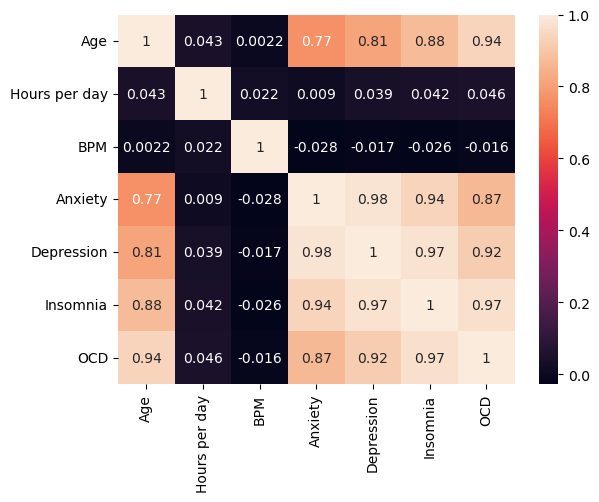

In [41]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [43]:
# There is a strong correlation between:
# 1.Anxiety & Depression
# 2.Depression & Insomnia
# 3.OCD & Insomnia
# 4.OCD & Age

# Scatter Plots

# Anxiety & Depression

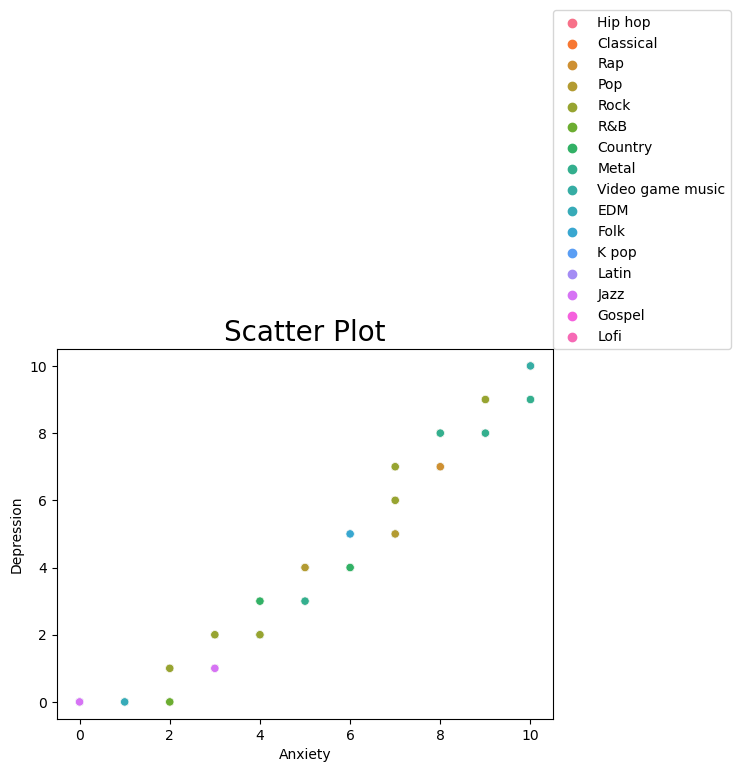

In [106]:
sns.scatterplot(x='Anxiety',y='Depression', hue='Fav Genre',data=data)
plt.title('Scatter Plot',fontsize=20)
plt.legend(loc=(1,1))
plt.show()

# Depression & Insomnia

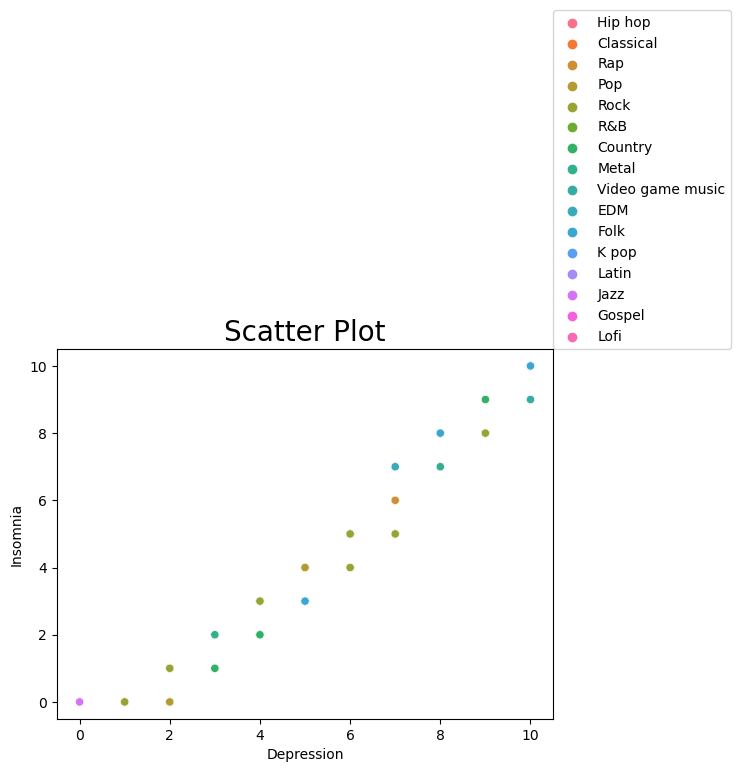

In [108]:
sns.scatterplot(x='Depression',y='Insomnia',hue='Fav Genre', data=data)
plt.title('Scatter Plot',fontsize=20)
plt.legend(loc=(1,1))
plt.show()

# OCD & Insomnia

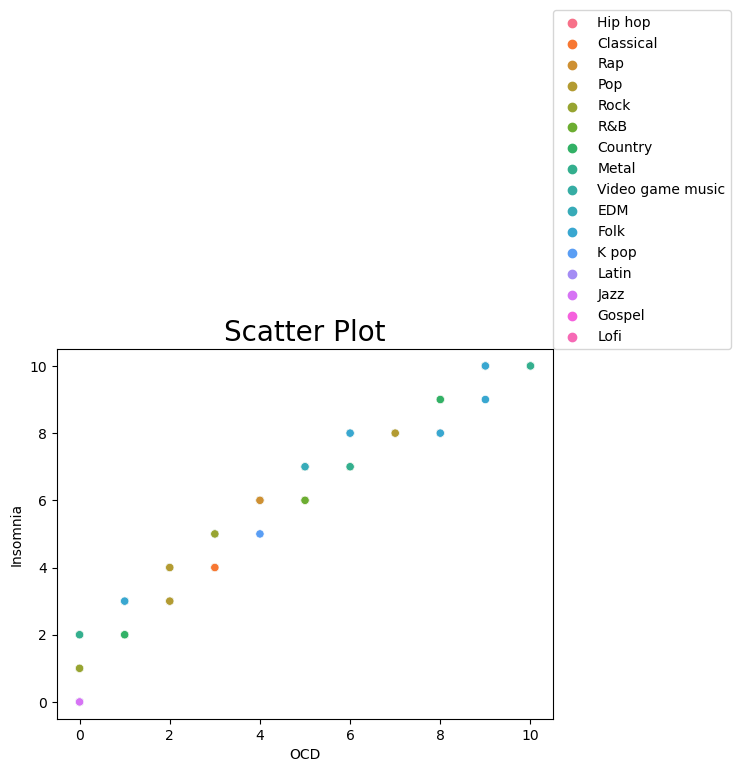

In [110]:
sns.scatterplot(x='OCD',y='Insomnia',hue='Fav Genre', data=data)
plt.title('Scatter Plot',fontsize=20)
plt.legend(loc=(1,1))
plt.show()

# Boxplot - BPM

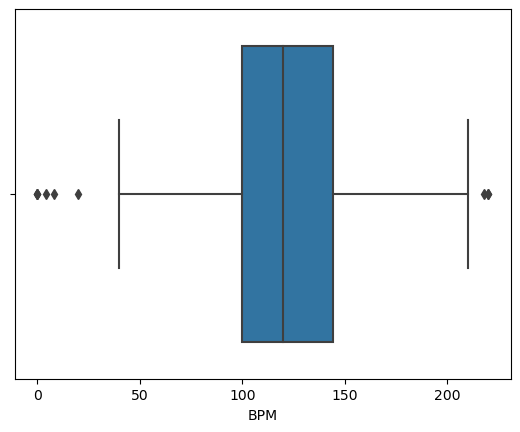

In [68]:
sns.boxplot(x='BPM',data=data)
plt.show()

In [72]:
data['BPM'].describe()

count    614.000000
mean     122.765472
std       34.083197
min        0.000000
25%      100.000000
50%      120.000000
75%      144.000000
max      220.000000
Name: BPM, dtype: float64

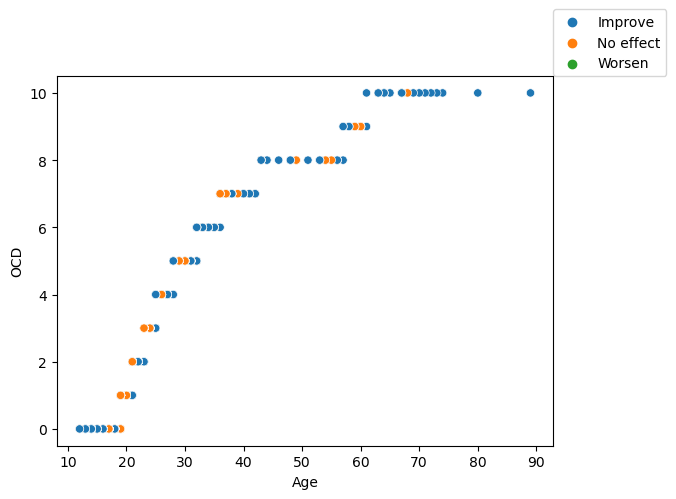

In [113]:
sns.scatterplot(x='Age',y='OCD',data=data,hue='Music effects')
plt.legend(loc=(1,1))
plt.show()

In [114]:
# We can see that music effects positively ie; improves individuals at every age group and OCD level